In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

First, let's read in our counties shapefiles. This one was obtained from http://www.tngis.org/administrative-boundaries.htm

Shapefiles are another type of geospatial data file that you can use to create a GeoDataFrame.

In [2]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [3]:
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


Remember, if we call `.plot()` and a GeoDataFrame, it will render a plot using the geometry column.

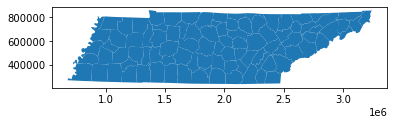

In [4]:
counties.plot();

If we want a larger plot, we can use `plt.subplots()` and set a figsize. When we create our plot, we need to specify that we want it to render on the axes we just created.

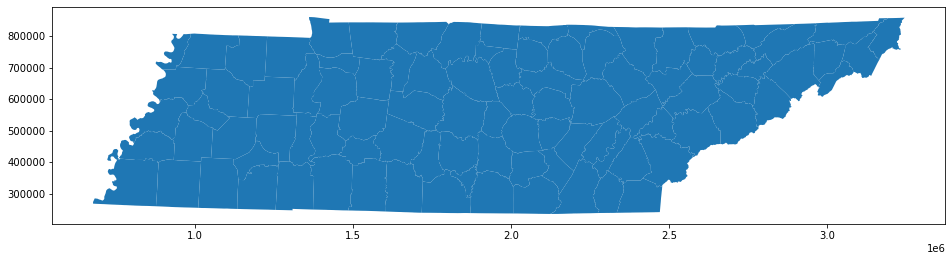

In [5]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax);

Since the axes are not conveying useful information, we can remove them.

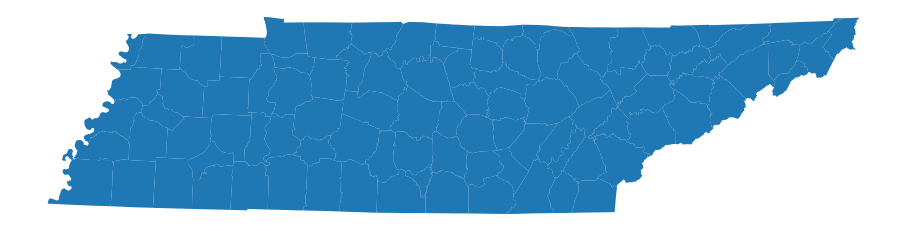

In [6]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax)
ax.axis('off');

In [7]:
unemployment = pd.read_csv('../data/unemployment.csv')

unemployment.head()

,COUNTY,STATE,periodName,year,unemployment_rate
0,Anderson,TN,December,2018,3.2
1,Bedford,TN,December,2018,3.2
2,Benton,TN,December,2018,3.8
3,Bledsoe,TN,December,2018,5.4
4,Blount,TN,December,2018,2.8


Now, we can merge the two together. If we put the GeoDataFrame on the left, the result will be a GeoDataFrame.

In [8]:
counties = pd.merge(left = counties, right = unemployment, 
                    left_on = 'NAME', right_on = 'COUNTY')
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,COUNTY,STATE,periodName,year,unemployment_rate
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester,TN,December,2018,3.0
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne,TN,December,2018,2.9
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton,TN,December,2018,4.4
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hamilton,TN,December,2018,2.7
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Stewart,TN,December,2018,2.9


To color our map based on a column, we can use the `column` argument.

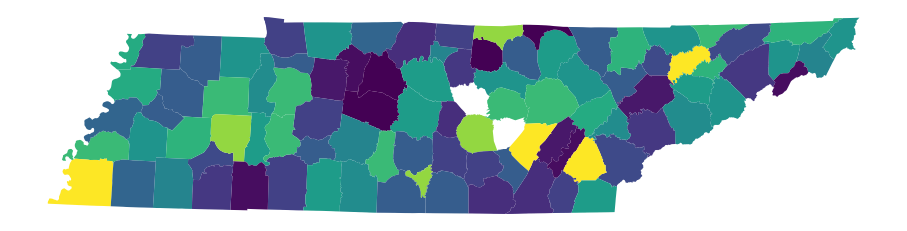

In [9]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              ax = ax)
ax.axis('off');

The default colormap is not great. We can change it by specifying the `cmap` argument. A list of named colormaps is available at https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html.  

With a choropleth which shows an amount for each region relative to the other regions, you want a **sequential** colormap.

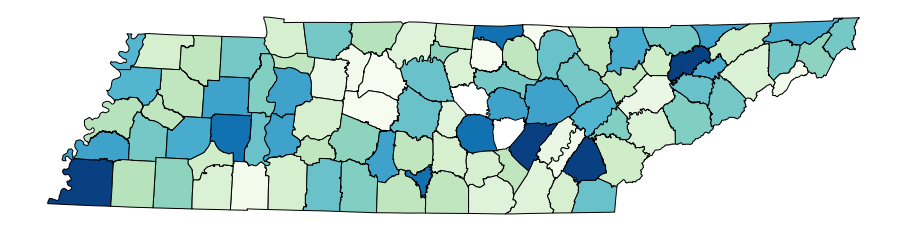

In [10]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              ax = ax)
ax.axis('off');

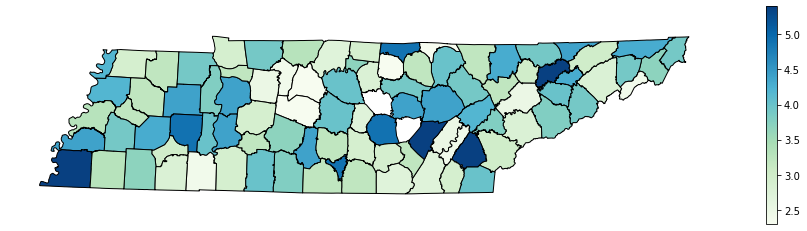

In [11]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
ax.axis('off');

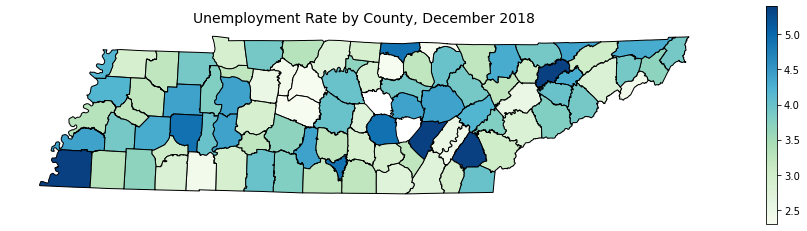

In [12]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Unemployment Rate by County, December 2018', fontsize = 14)
ax.axis('off');